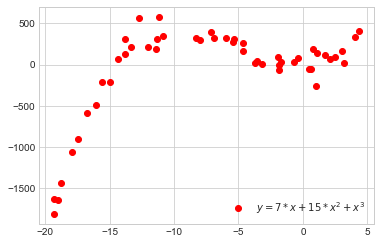

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples, 1) - 0.8)
y = 7 * x + 15 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples, 1)
plt.plot(x,y,'ro',label=r'$y = 7 * x + 15 * x^2 + x^3$')
plt.legend(loc='best')

# 1) Please plot the noisy data and the polynomial you found (in the same figure). You can use any value of m selected from 2, 3, 4, 5, 6.

In [8]:
X_train = x[:int(0.8*number_of_samples)]
X_test = x[int(0.8*number_of_samples):]

In [17]:
y_train = y[:int(0.8*number_of_samples)]
y_test = y[int(0.8*number_of_samples):]

print(len(x),len(X_train),len(X_test))
print(len(y),len(y_train),len(y_test))

50 40 10
50 40 10


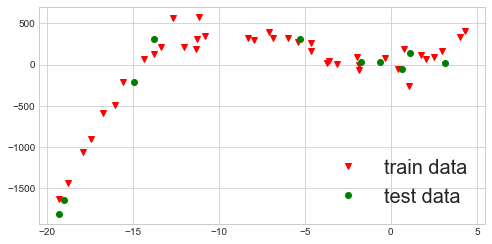

In [20]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)
plt.plot(X_train,y_train,'rv',label='train data')
plt.plot(X_test,y_test,'go',label='test data')
plt.legend(loc='best', fontsize=20)
plt.show()

In [30]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
import matplotlib.colors as mcolors
colors=list(mcolors.TABLEAU_COLORS.keys())

In [69]:
res={}
fittingFunction={}
for i in [2,3,4,5,6]:
    #fitting poly function with m
    tmp_z1=np.polyfit(X_train.flatten(),y_train.flatten(),i)
    #get coefficient
    fittingFunction[i]=np.poly1d(tmp_z1)
    print(fittingFunction[i])
    # each poly function with its X_train values
    res[i]=fittingFunction[i](X_train.flatten())
    


        2
-6.905 x - 66.34 x + 215
       3         2
1.003 x + 15.35 x + 9.852 x - 20.32
          4         3         2
0.003059 x + 1.095 x + 15.99 x + 9.156 x - 26.4
            5           4          3         2
-0.0003712 x - 0.01051 x + 0.9568 x + 15.85 x + 11.43 x - 24.51
           6            5          4         3         2
0.0001911 x + 0.008196 x + 0.1107 x + 1.387 x + 13.68 x + 2.536 x - 17.15


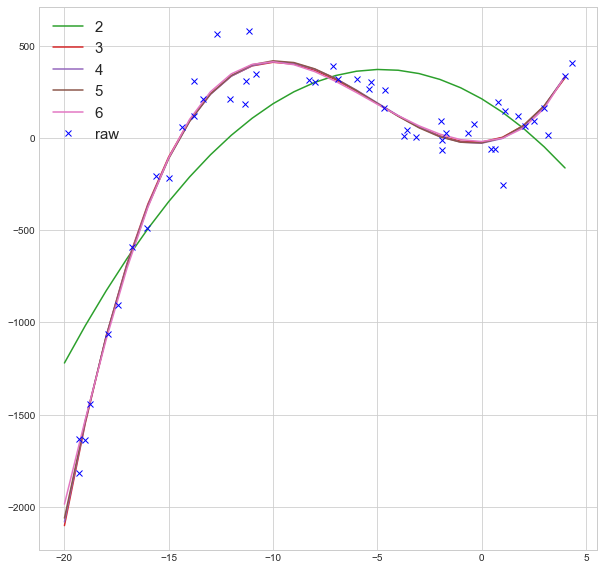

In [41]:
ref_x=[i for i in range(-20,5)]


for i in range(2,7):
    plt.plot(ref_x,fittingFunction[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[i]],label=str(i))
    
plt.plot(x,y,'bx',label='raw')
plt.legend(loc='best', fontsize=15)
plt.show()

# 2)Plot MSE versus order m, for m = 1, 2, 3, 4, 5, 6, 7, 8 respectively. Identify the best choice of m.

In [54]:
res={}
fittingFunction={}
for i in [1,2,3,4,5,6,7,8]:
    tmp_z1=np.polyfit(X_train.flatten(),y_train.flatten(),i)
    fittingFunction[i]=np.poly1d(tmp_z1)
    
    res[i]=fittingFunction[i](X_train.flatten())
    

In [56]:
mse_train=[((y_train-fittingFunction[i](X_train))**2).mean() for i in range(1,9)]
mse_test=[((y_test-fittingFunction[i](X_test))**2).mean() for i in range(1,9)]
mse_sum=[i+j for i,j in zip(mse_train,mse_test)]

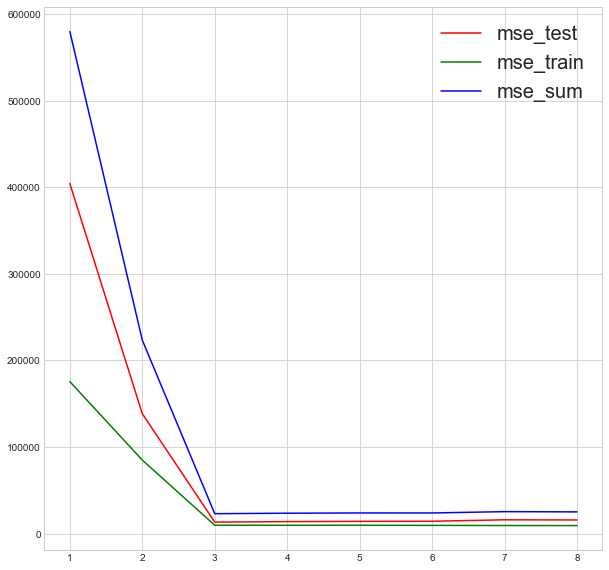

In [57]:
plt.plot([1,2,3,4,5,6,7,8],mse_test,'r',label='mse_test')
plt.plot([1,2,3,4,5,6,7,8],mse_train,'g',label='mse_train')
plt.plot([1,2,3,4,5,6,7,8],mse_sum,'b',label='mse_sum')
plt.legend(loc='best', fontsize=20)

In [61]:
# m = 3 is the best choice.

# 3) Change variable noise_scale to 150, 200, 400, 600, 1000 respectively, re-run the algorithm and plot the polynomials with the m found in 2). Discuss the impact of noise scale to the accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of noise_scale.]

In [70]:
noise_scale_list=[150,200,400,600,1000]
ns_x={}
ns_y={}
ns_fit_func={}
for noise_scale in noise_scale_list:
    ns_x[noise_scale] = 25*(np.random.rand(number_of_samples, 1) - 0.8)
    ns_y[noise_scale] = 7 * ns_x[noise_scale] + 15 * ns_x[noise_scale]**2 + 1 * ns_x[noise_scale]**3 + noise_scale*np.random.randn(number_of_samples, 1)
    tmp_z1 = np.polyfit(ns_x[noise_scale].flatten(),ns_y[noise_scale].flatten(),3)
    ns_fit_func[noise_scale]=np.poly1d(tmp_z1)

In [71]:
for i in noise_scale_list:
    print(ns_fit_func[i])

        3         2
0.9159 x + 12.95 x - 3.54 x + 12.95
        3         2
0.9706 x + 14.94 x + 11.14 x - 26.97
      3         2
1.19 x + 21.04 x + 47.93 x - 2.375
        3         2
0.6775 x + 6.566 x - 25.83 x + 324.7
        3        2
0.4928 x + 1.27 x - 76.47 x + 386


In [72]:
label={}
for ns in noise_scale_list:
    tmp_label=r'$y = '
    for i in range(len(ns_fit_func[ns].c)):
        if i!=0: tmp_label+='+'
        tmp_label+='('+str(round(ns_fit_func[ns].c[i],3))+'*x^'+str(3-i)+')'
    label[ns]=tmp_label+'$'

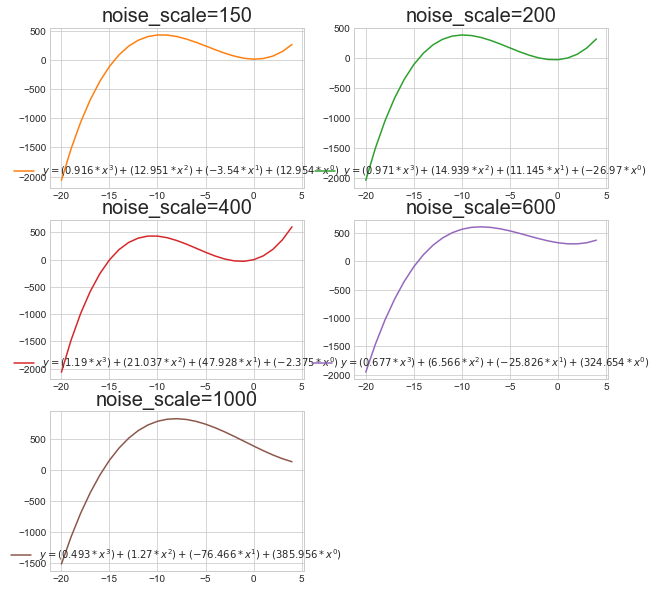

In [73]:
fig = plt.figure()
a=1
for i in noise_scale_list:
    plt.subplot(3,2,a).set_title('noise_scale={}' .format(i),fontdict={'weight':'normal','size': 20})
    plt.plot(ref_x,ns_fit_func[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[a]],label=label[i])
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    plt.legend(loc='lower center', fontsize=10)
    a+=1

plt.show()

In [74]:
label

{150: '$y = (0.916*x^3)+(12.951*x^2)+(-3.54*x^1)+(12.954*x^0)$',
 200: '$y = (0.971*x^3)+(14.939*x^2)+(11.145*x^1)+(-26.97*x^0)$',
 400: '$y = (1.19*x^3)+(21.037*x^2)+(47.928*x^1)+(-2.375*x^0)$',
 600: '$y = (0.677*x^3)+(6.566*x^2)+(-25.826*x^1)+(324.654*x^0)$',
 1000: '$y = (0.493*x^3)+(1.27*x^2)+(-76.466*x^1)+(385.956*x^0)$'}

In [ ]:
# From the above figure, we can see that the larger the noise scale, the more inaccurate the parameters are

# 4)Change variable number_of_samples to 40, 30, 20, 10 respectively, re-ran the algorithm and plot the polynomials with the m found in 2). Discuss the impact of the number of samples to the accuracy of the returned parameters. [You need to plot a figure like in 1) for each choice of number_of_samples.]

In [86]:
number_of_samples_list=[40,30,20,10]
nos_x={}
nos_y={}
nos_fit_func={}
for nos in number_of_samples_list:
    nos_x[nos] = 25*(np.random.rand(nos, 1) - 0.8)
    nos_y[nos] = 7 * nos_x[nos] + 15 * nos_x[nos]**2 + 1 * nos_x[nos]**3 + 100*np.random.randn(nos, 1)
    tmp_z1 = np.polyfit(nos_x[nos].flatten(),nos_y[nos].flatten(),3)
    nos_fit_func[nos]=np.poly1d(tmp_z1)

In [87]:
label={}
for nos in number_of_samples_list:
    tmp_label=r'$y = '
    for i in range(len(nos_fit_func[nos].c)):
        if i!=0: tmp_label+='+'
        tmp_label+='('+str(round(nos_fit_func[nos].c[i],3))+'*x^'+str(3-i)+')'
    label[nos]=tmp_label+'$'

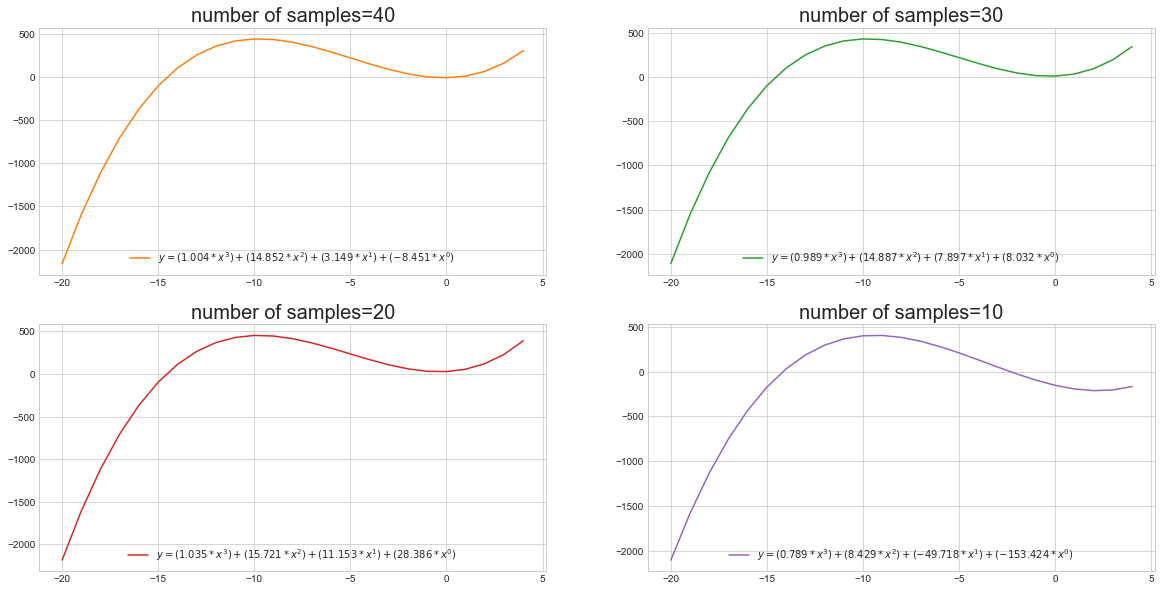

In [88]:
fig = plt.figure()
a=1
for i in number_of_samples_list:
    plt.subplot(2,2,a).set_title('number of samples={}' .format(i),fontdict={'weight':'normal','size': 20})
    plt.plot(ref_x,nos_fit_func[i](ref_x),color=mcolors.TABLEAU_COLORS[colors[a]],label=label[i])
    plt.rcParams['figure.figsize'] = (20.0, 10.0)
    plt.legend(loc='lower center', fontsize=10)
    a+=1

plt.show()

In [78]:
label

{40: '$y = (1.079*x^3)+(21.326*x^2)+(2.618*x^1)+(-30.157*x^0)$',
 30: '$y = (0.95*x^3)+(19.082*x^2)+(5.824*x^1)+(57.858*x^0)$',
 20: '$y = (0.924*x^3)+(17.306*x^2)+(-13.478*x^1)+(7.41*x^0)$',
 10: '$y = (0.961*x^3)+(19.1*x^2)+(-1.201*x^1)+(-32.799*x^0)$'}

In [79]:
# From the above figure, we can see that the smaller the number of samples, the more inaccurate the parameters are